### Just experimenting the various Ensemble Techniques

#### A model to predict whether a loan seeker would be a defaulter or not

##### *Import the  libraries*

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from os import system
from IPython.display import Image

In [2]:
data = pd.read_csv('credit.csv')
data.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [3]:
data.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [4]:
data.shape

(1000, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

#### Coversion of columns with an object datatype into categorical  variables

In [6]:
for feature in data.columns:
    if data[feature].dtype == 'object':
        data[feature] = pd.Categorical(data[feature])
        
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   checking_balance      1000 non-null   category
 1   months_loan_duration  1000 non-null   int64   
 2   credit_history        1000 non-null   category
 3   purpose               1000 non-null   category
 4   amount                1000 non-null   int64   
 5   savings_balance       1000 non-null   category
 6   employment_duration   1000 non-null   category
 7   percent_of_income     1000 non-null   int64   
 8   years_at_residence    1000 non-null   int64   
 9   age                   1000 non-null   int64   
 10  other_credit          1000 non-null   category
 11  housing               1000 non-null   category
 12  existing_loans_count  1000 non-null   int64   
 13  job                   1000 non-null   category
 14  dependents            1000 non-null   int64   
 15  phone

#### A check for the number of categories in each category

In [7]:
print(data.checking_balance.value_counts())
print(data.credit_history.value_counts())
print(data.purpose.value_counts())
print(data.savings_balance.value_counts())
print(data.employment_duration.value_counts())
print(data.other_credit.value_counts())
print(data.housing.value_counts())
print(data.job.value_counts())
print(data.phone.value_counts())
print(data.default.value_counts())


unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64
none     814
bank     139
store     47
Name: other_credit, dtype: int64
own      713
rent     179
other    108
Name: housing, dtype: int64
skilled       630
unskilled     200
management    148
unemployed     22
Name: job, dtype: int64
no     596
yes    404
Name: phone, dtype: int64
no     700
yes  

In [8]:
replaceStruct = {
    'checking_balance': {'< 0 DM': 1, '1 - 200 DM': 2, '> 200 DM': 3, 'unknown':-1},
    'credit_history': {'critical':1, 'poor': 2, 'good': 3, 'very good': 4, 'perfect': 5},
    'savings_balance': {'< 100 DM': 1, '100 - 500 DM': 2, '500 - 1000 DM': 3, '> 1000 DM': 4, 'unknown':-1},
    'employment_duration': {'unemployed':1, '< 1 year': 2, '1 - 4 years': 3, '4 - 7 years': 4, '> 7 years': 5},
    'phone': {'no':1, 'yes':2},
    'default': {'no':0, 'yes':1} 
}

oneHotCols = ['purpose', 'housing', 'other_credit', 'job']

In [9]:
data = data.replace(replaceStruct)
data = pd.get_dummies(data, columns=oneHotCols, drop_first=True)
data.head()

,checking_balance,months_loan_duration,credit_history,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,...,purpose_education,purpose_furniture/appliances,purpose_renovations,housing_own,housing_rent,other_credit_none,other_credit_store,job_skilled,job_unemployed,job_unskilled
0,1,6,1,1169,-1,5,4,4,67,2,...,0,1,0,1,0,1,0,1,0,0
1,2,48,3,5951,1,3,2,2,22,1,...,0,1,0,1,0,1,0,1,0,0
2,-1,12,1,2096,1,4,2,3,49,1,...,1,0,0,1,0,1,0,0,0,1
3,1,42,3,7882,1,4,2,4,45,1,...,0,1,0,0,0,1,0,1,0,0
4,1,24,2,4870,1,3,3,4,53,2,...,0,0,0,0,0,1,0,1,0,0


In [10]:
data.shape

(1000, 25)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   checking_balance              1000 non-null   category
 1   months_loan_duration          1000 non-null   int64   
 2   credit_history                1000 non-null   category
 3   amount                        1000 non-null   int64   
 4   savings_balance               1000 non-null   category
 5   employment_duration           1000 non-null   category
 6   percent_of_income             1000 non-null   int64   
 7   years_at_residence            1000 non-null   int64   
 8   age                           1000 non-null   int64   
 9   existing_loans_count          1000 non-null   int64   
 10  dependents                    1000 non-null   int64   
 11  phone                         1000 non-null   category
 12  default                       1000 non-null   cat

#### *Split the data*

In [12]:
x = data.drop('default', axis=1)
y = data['default']

#### Scale the data

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()
scaler.fit(x)
x_scaled = scaler.transform(x)

In [15]:
X = pd.DataFrame(x_scaled)

In [16]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### Decision Tree Model

In [17]:
dTree = DecisionTreeClassifier(criterion= 'gini', random_state=1)
dTree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Score the Decision Tree

In [18]:
print(dTree.score(x_train, y_train))
print(dTree.score(x_test, y_test))

1.0
0.6833333333333333


##### A visulization of the decision tree

In [22]:
# train_char_label = ['No', 'Yes']
# Credit_Tree_File = open('credit_tree.dot', 'w')
# dot_data = tree.export_graphviz(dTree, out_file = Credit_Tree_File, feature_names= list(x_train), class_names = train_char_label)

In [21]:
# retCode = system('dot -Tpng credit_tree.dot -o credit_tree.png')
# if(retCode>0):
#     print('system command returning error: '+str(retCode))
# else:
#     display(Image("credit_tree.png"))

#### *Prunning the Decision Tree model (Reducing overfitting) (Regularization)*

In [23]:
dTreeR = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=1)
dTreeR.fit(x_train, y_train)
print(dTreeR.score(x_train, y_train))
print(dTreeR.score(x_test, y_test))

0.7485714285714286
0.75


In [30]:
print(pd.DataFrame(dTreeR.feature_importances_, columns = ['Importance'], index = x.columns))

                              Importance
checking_balance                0.495033
months_loan_duration            0.170676
credit_history                  0.166960
amount                          0.000000
savings_balance                 0.064798
employment_duration             0.046269
percent_of_income               0.000000
years_at_residence              0.000000
age                             0.000000
existing_loans_count            0.000000
dependents                      0.000000
phone                           0.000000
purpose_car                     0.000000
purpose_car0                    0.000000
purpose_education               0.000000
purpose_furniture/appliances    0.000000
purpose_renovations             0.000000
housing_own                     0.000000
housing_rent                    0.000000
other_credit_none               0.056264
other_credit_store              0.000000
job_skilled                     0.000000
job_unemployed                  0.000000
job_unskilled   

0.75


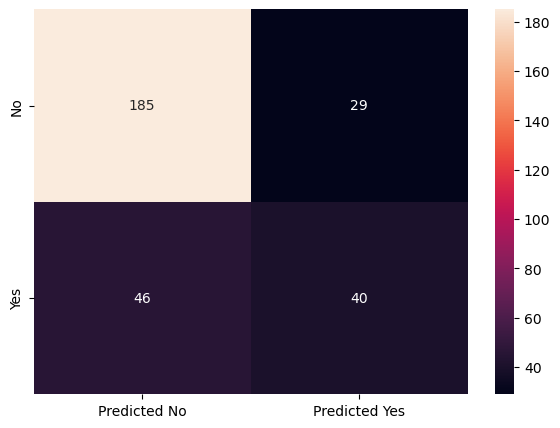

In [26]:
print(dTreeR.score(x_test, y_test))
y_predict = dTreeR.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                     columns= [i for i in ['Predicted No', 'Predicted Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()


## ENSEMBLE TECHNIQUES

#### Bagging

In [40]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(estimator=dTree, n_estimators=50, random_state=1)
# You can not specify the base model, it will do it automatically (example)
# bgcl = BaggingClassifier(n_estimators=50, random_state=1)
bgcl = bgcl.fit(x_train, y_train)

0.7533333333333333


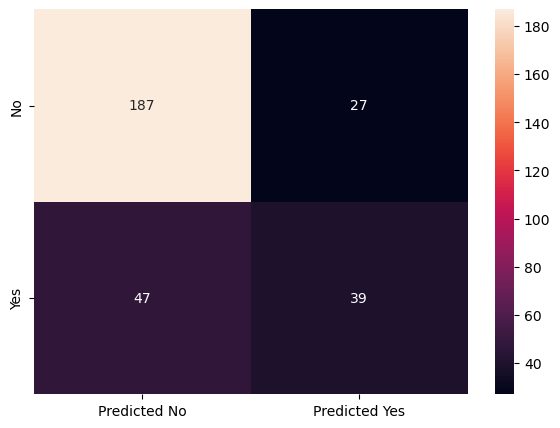

In [41]:
print(bgcl.score(x_test, y_test))
y_predict = bgcl.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                     columns= [i for i in ['Predicted No', 'Predicted Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

### AdaBoosting Model

In [44]:
from sklearn.ensemble import AdaBoostClassifier

abcl = AdaBoostClassifier(n_estimators=10, random_state=1)
abcl = abcl.fit(x_train, y_train)

0.74


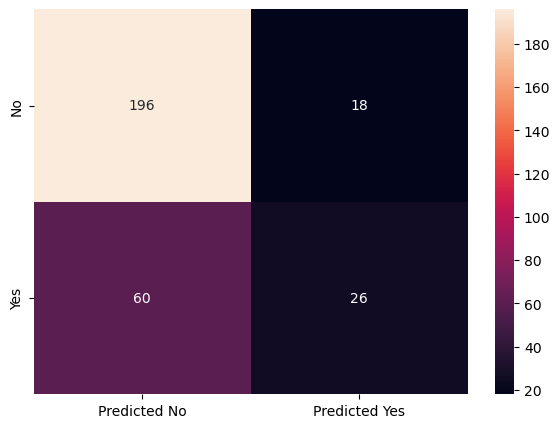

In [45]:
print(abcl.score(x_test, y_test))
y_predict = abcl.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                     columns= [i for i in ['Predicted No', 'Predicted Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### GradientBoosting Model

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators=50, random_state=1)
gbcl = gbcl.fit(x_train, y_train)

0.7533333333333333


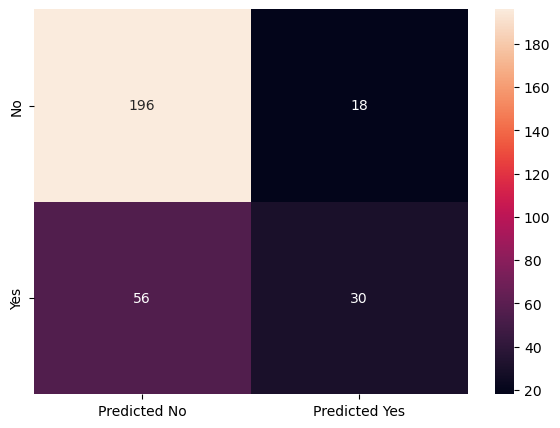

In [47]:
print(gbcl.score(x_test, y_test))
y_predict = gbcl.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                     columns= [i for i in ['Predicted No', 'Predicted Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### XGBoost Model

In [49]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

0.7166666666666667


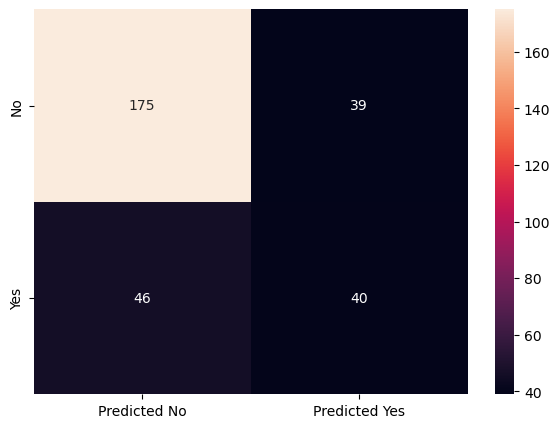

In [50]:
print(xgb.score(x_test, y_test))
y_predict = xgb.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                     columns= [i for i in ['Predicted No', 'Predicted Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()

#### Random Forest Model

In [51]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators=50, random_state=1, max_features=12)
rfcl = rfcl.fit(x_train, y_train)

0.7666666666666667


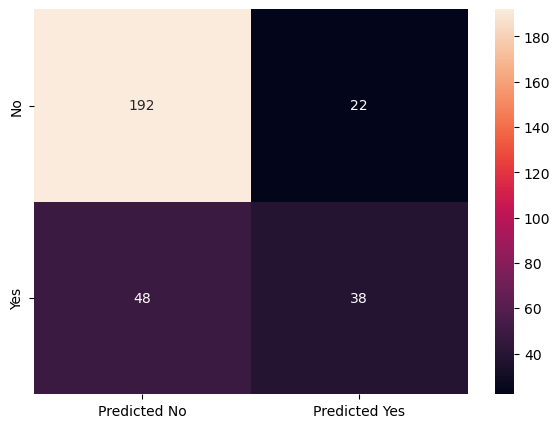

In [52]:
print(rfcl.score(x_test, y_test))
y_predict = rfcl.predict(x_test)

cm = metrics.confusion_matrix(y_test, y_predict, labels=[0,1])

df_cm = pd.DataFrame(cm, index = [i for i in ['No', 'Yes']],
                     columns= [i for i in ['Predicted No', 'Predicted Yes']])

plt.figure(figsize=(7,5))
sns.heatmap(df_cm, annot=True, fmt='g')
plt.show()